# 4a_AETI per crop season 

## 1 Import the module

In [48]:
import os
import WaPOR
from WaPOR import GIS_functions as gis
import glob
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt

#Get personaL WAPOR API Token by registering in the top right cornor of the page: wapor.apps.fao.org/home/1

## 2 Get the corrected dekadal AETI raster data

In [49]:
dir_proj = os.getcwd()  
dir_data = "Data"

input_folder = os.path.join(dir_proj, dir_data, "2aL2_AETI_D") 
input_fhs=glob.glob(input_folder+'\*.tif')
input_fhs

['E:\\Projects\\WaterPiP\\CaseStudies\\Xinavana\\WaPORDocker\\Data\\2aL2_AETI_D\\L2_AETI_0901.tif',
 'E:\\Projects\\WaterPiP\\CaseStudies\\Xinavana\\WaPORDocker\\Data\\2aL2_AETI_D\\L2_AETI_0902.tif',
 'E:\\Projects\\WaterPiP\\CaseStudies\\Xinavana\\WaPORDocker\\Data\\2aL2_AETI_D\\L2_AETI_0903.tif',
 'E:\\Projects\\WaterPiP\\CaseStudies\\Xinavana\\WaPORDocker\\Data\\2aL2_AETI_D\\L2_AETI_0904.tif',
 'E:\\Projects\\WaterPiP\\CaseStudies\\Xinavana\\WaPORDocker\\Data\\2aL2_AETI_D\\L2_AETI_0905.tif',
 'E:\\Projects\\WaterPiP\\CaseStudies\\Xinavana\\WaPORDocker\\Data\\2aL2_AETI_D\\L2_AETI_0906.tif',
 'E:\\Projects\\WaterPiP\\CaseStudies\\Xinavana\\WaPORDocker\\Data\\2aL2_AETI_D\\L2_AETI_0907.tif',
 'E:\\Projects\\WaterPiP\\CaseStudies\\Xinavana\\WaPORDocker\\Data\\2aL2_AETI_D\\L2_AETI_0908.tif',
 'E:\\Projects\\WaterPiP\\CaseStudies\\Xinavana\\WaPORDocker\\Data\\2aL2_AETI_D\\L2_AETI_0909.tif',
 'E:\\Projects\\WaterPiP\\CaseStudies\\Xinavana\\WaPORDocker\\Data\\2aL2_AETI_D\\L2_AETI_0910.tif',


In [50]:
print (input_fhs[0])

E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2aL2_AETI_D\L2_AETI_0901.tif


## 3 Specifing the AETI cube code and time range to get raster id

In [51]:
WaPOR.API.version=2
cube_code='L2_AETI_D' 
time_range='2009-01-01,2019-09-30'

df_avail = WaPOR.API.getAvailData(cube_code, time_range)
df_avail

,DEKAD,raster_id,bbox,time_code
0,2009-01 from 01 to 10,L2_AETI_0901,"[{'srid': 'EPSG:4326', 'value': [-30.0044643, ...","[2009-01-01,2009-01-11)"
1,2009-01 from 11 to 20,L2_AETI_0902,"[{'srid': 'EPSG:4326', 'value': [-30.0044643, ...","[2009-01-11,2009-01-21)"
2,2009-01 from 21 to 31,L2_AETI_0903,"[{'srid': 'EPSG:4326', 'value': [-30.0044643, ...","[2009-01-21,2009-02-01)"
3,2009-02 from 01 to 10,L2_AETI_0904,"[{'srid': 'EPSG:4326', 'value': [-30.0044643, ...","[2009-02-01,2009-02-11)"
4,2009-02 from 11 to 20,L2_AETI_0905,"[{'srid': 'EPSG:4326', 'value': [-30.0044643, ...","[2009-02-11,2009-02-21)"
5,2009-02 from 21 to 28,L2_AETI_0906,"[{'srid': 'EPSG:4326', 'value': [-30.0044643, ...","[2009-02-21,2009-03-01)"
6,2009-03 from 01 to 10,L2_AETI_0907,"[{'srid': 'EPSG:4326', 'value': [-30.0044643, ...","[2009-03-01,2009-03-11)"
7,2009-03 from 11 to 20,L2_AETI_0908,"[{'srid': 'EPSG:4326', 'value': [-30.0044643, ...","[2009-03-11,2009-03-21)"
8,2009-03 from 21 to 31,L2_AETI_0909,"[{'srid': 'EPSG:4326', 'value': [-30.0044643, ...","[2009-03-21,2009-04-01)"
9,2009-04 from 01 to 10,L2_AETI_0910,"[{'srid': 'EPSG:4326', 'value': [-30.0044643, ...","[2009-04-01,2009-04-11)"


## 4 Specify the directry of the output folder 

In [32]:
dir_proj = os.getcwd()  
dir_data = "Data"
output_folder = os.path.join(dir_proj, dir_data, "4aL2_AETI_season") 
output_folder

'E:\\Projects\\WaterPiP\\CaseStudies\\Xinavana\\WaPORDocker\\Data\\4aL2_AETI_season'

In [33]:
# if the directory and folder does not exit, make one
if not os.path.exists(output_folder):
    os.makedirs(output_folder) 

## 5 Calculate seasonal AETI and save the raster map in the output_folder

In [34]:
in_fh=input_fhs[0]
in_fh

'E:\\Projects\\WaterPiP\\CaseStudies\\Xinavana\\WaPORDocker\\Data\\2bL2_NPP_D\\L2_NPP_0901.tif'

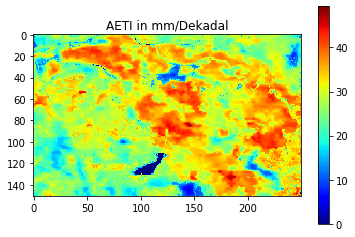

In [37]:
# Plot the dekadal AETI
A = gis.OpenAsArray(in_fh, nan_values=True) 
plt.imshow(A, cmap='jet')
plt.colorbar()
plt.title('AETI in mm/Dekadal')
plt.show()  

In [38]:
# Inport the landcover rasters
dir_proj = os.getcwd()  
dir_data = "Data"

input_folder = os.path.join(dir_proj, dir_data, "2cL2_LCC_A") 
LCC_fhs      = glob.glob(input_folder+'\*.tif')
LCC_fhs


# Save all landcover maps in LCC_tifs
LCC_tifs = []
for LCC_fhs in LCC_fhs:
    LCC_tifs.append(LCC_fhs)

print (LCC_tifs[0])    
#  E:\WaPORDocker\Data\3cL2_LCC_A

E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2cL2_LCC_A\L2_LCC_09.tif


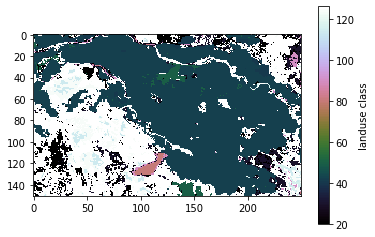

In [39]:
# Plot the LCC
A = gis.OpenAsArray(LCC_tifs[0], nan_values=True) 
plt.imshow(A, cmap=plt.cm.get_cmap('cubehelix', 126))
plt.colorbar(label='landuse class')  #(ticks=range(6), label='landuse class')
plt.show()  

E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\3ShapeTif\ShpTif.tif


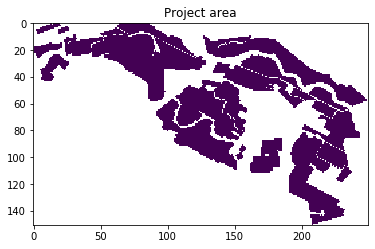

In [40]:
# Inport the shape of the project area (tif)
input_foldera = os.path.join(dir_proj, dir_data, "3ShapeTif") 
ProArea       = glob.glob(input_foldera+'\*.tif')
print(ProArea[0])

# Plot the Project area
B = gis.OpenAsArray(ProArea[0], nan_values=True) 
plt.imshow(B)
plt.title('Project area')
plt.show()  

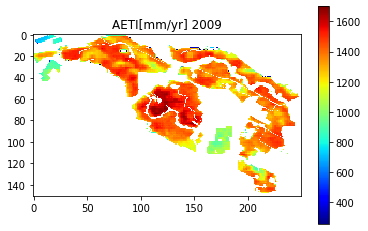

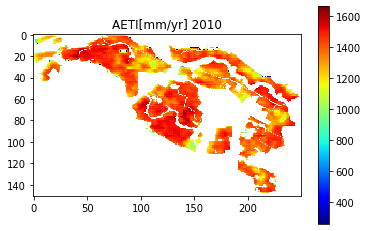

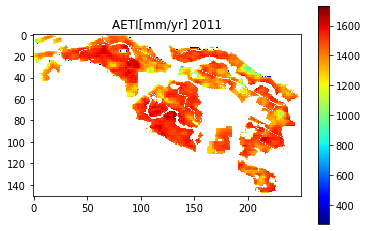

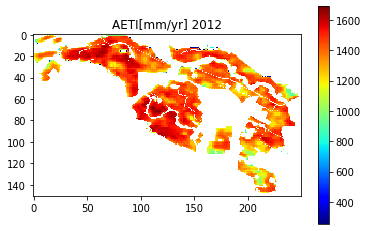

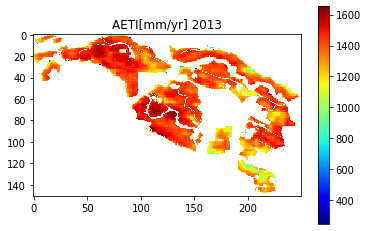

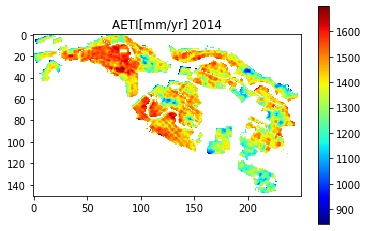

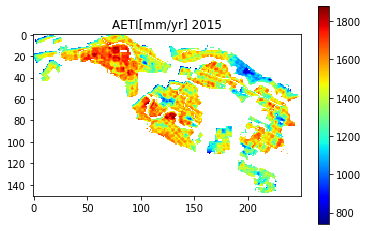

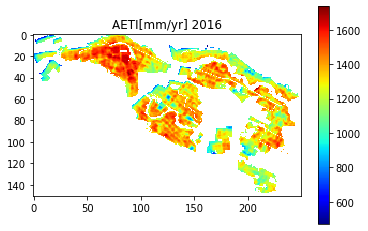

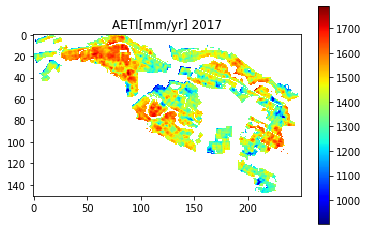

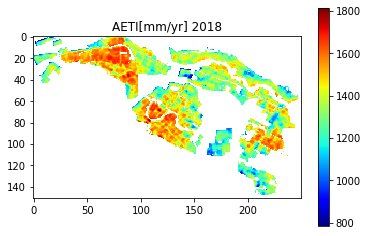

In [55]:
# collecting Geoinfo such as projection, the x and y axis
in_fh=input_fhs[0]   # E:\\Projects\\WaterPiP\\CaseStudies\\Xinavana\\WaPORDocker\\Data\\2aL2_AETI_D\\L2_AETI_0901.tif
driver,NDV,xsize,ysize,GeoT,Projection=gis.GetGeoInfo(in_fh)

## function to aggregate the AETI RASTER data for a crop season
def SumSeason(in_fh, sowing_date, harvesting_date, LCC, a=ProArea[0], saveSum = output_folder):
    period_dates=pd.date_range(sowing_date,harvesting_date,freq='D') #generate dates b/n sowing and harvesting dates
    period_fhs=[]
    # collect the rasters if they are within sowing and harvesting date
    for in_fh in input_fhs:
        #get raster id from file name
        raster_id=os.path.split(in_fh)[-1].split('.')[0]               # L2_AETI_0901
        #get raster info using raster id
        raster_info=df_avail.loc[df_avail['raster_id']==raster_id]     # the time_code corresponding to raster id
        #get start and end date of raster
        raster_startdate=raster_info['time_code'].iloc[0].split(',')[0] # [2009-01-01
        raster_startdate=re.sub(r"[[)]","", raster_startdate)           # replace [) with nothing(delete)
        raster_enddate=raster_info['time_code'].iloc[0].split(',')[-1]  # 2009-01-11)
        raster_enddate=re.sub(r"[[)]","", raster_enddate)               
        #check if raster belong to period
        if ((raster_startdate in period_dates) or (raster_enddate in period_dates)):
            period_fhs.append(in_fh)
    
    # add the layers between the sowing and harvesting dates
    period_fhs
    period_fh=period_fhs[0]
    Sums=0
    for period_fh in period_fhs:
        Sum=gis.OpenAsArray(period_fh, nan_values=True)
        Sum=np.where(Sum<0,0,Sum) # mask out flagged value -9998
        Sums+=Sum
       
    # maskout non crop here
    Lcc=gis.OpenAsArray(LCC)
    ProAreaA=gis.OpenAsArray(a, nan_values=True)
    Sums=np.where((Lcc==42) & (ProAreaA==1),Sums,np.nan)
    
    # save the array in raster format, name it with the raster_id and sowing and harvesting date
    out_fh=os.path.join(output_folder,raster_id.split('_')[1]+'_'+sowing_date+'_to_'+harvesting_date+'.tif')        
    gis.CreateGeoTiff(out_fh,Sums,driver,NDV,xsize,ysize,GeoT,Projection) ### Save the array 'Sums' as raster

    # Plot the raster map
    plt.imshow(Sums, cmap='jet')
    plt.colorbar()
    plt.title(raster_id.split('_')[1]+'[mm/yr] '+sowing_date.split('-')[0])
    plt.show()  
    
    return Sums    
  
## Specify the planting and harvesting date
AETIseason1 = SumSeason(input_fhs, '2009-01-01','2009-12-31', LCC=LCC_tifs[0])
AETIseason2 = SumSeason(input_fhs, '2010-01-01','2010-12-31', LCC=LCC_tifs[1])
AETIseason3 = SumSeason(input_fhs, '2011-01-01','2011-12-31', LCC=LCC_tifs[2])
AETIseason4 = SumSeason(input_fhs, '2012-01-01','2012-12-31', LCC=LCC_tifs[3])
AETIseason5 = SumSeason(input_fhs, '2013-01-01','2013-12-31', LCC=LCC_tifs[4])
AETIseason6 = SumSeason(input_fhs, '2014-01-01','2014-12-31', LCC=LCC_tifs[5])
AETIseason7 = SumSeason(input_fhs, '2015-01-01','2015-12-31', LCC=LCC_tifs[6])
AETIseason8 = SumSeason(input_fhs, '2016-01-01','2016-12-31', LCC=LCC_tifs[7])
AETIseason9 = SumSeason(input_fhs, '2017-01-01','2017-12-31', LCC=LCC_tifs[8])
AETIseason10 = SumSeason(input_fhs, '2018-01-01','2018-12-31', LCC=LCC_tifs[9])


## Exercise (4a)
Calculate the ET per crop season for your project area 


# 4b_NPP per crop season

## 1 Get the list of corrected dekadal NPP raster data

In [25]:
dir_proj = os.getcwd()  
dir_data = "Data"

input_folder = os.path.join(dir_proj, dir_data, "2bL2_NPP_D") 
input_fhs=glob.glob(input_folder+'\*.tif')
input_fhs

['E:\\Projects\\WaterPiP\\CaseStudies\\Xinavana\\WaPORDocker\\Data\\2bL2_NPP_D\\L2_NPP_0901.tif',
 'E:\\Projects\\WaterPiP\\CaseStudies\\Xinavana\\WaPORDocker\\Data\\2bL2_NPP_D\\L2_NPP_0902.tif',
 'E:\\Projects\\WaterPiP\\CaseStudies\\Xinavana\\WaPORDocker\\Data\\2bL2_NPP_D\\L2_NPP_0903.tif',
 'E:\\Projects\\WaterPiP\\CaseStudies\\Xinavana\\WaPORDocker\\Data\\2bL2_NPP_D\\L2_NPP_0904.tif',
 'E:\\Projects\\WaterPiP\\CaseStudies\\Xinavana\\WaPORDocker\\Data\\2bL2_NPP_D\\L2_NPP_0905.tif',
 'E:\\Projects\\WaterPiP\\CaseStudies\\Xinavana\\WaPORDocker\\Data\\2bL2_NPP_D\\L2_NPP_0906.tif',
 'E:\\Projects\\WaterPiP\\CaseStudies\\Xinavana\\WaPORDocker\\Data\\2bL2_NPP_D\\L2_NPP_0907.tif',
 'E:\\Projects\\WaterPiP\\CaseStudies\\Xinavana\\WaPORDocker\\Data\\2bL2_NPP_D\\L2_NPP_0908.tif',
 'E:\\Projects\\WaterPiP\\CaseStudies\\Xinavana\\WaPORDocker\\Data\\2bL2_NPP_D\\L2_NPP_0909.tif',
 'E:\\Projects\\WaterPiP\\CaseStudies\\Xinavana\\WaPORDocker\\Data\\2bL2_NPP_D\\L2_NPP_0910.tif',
 'E:\\Projects\\Wate

## 2 Specifing the NPP cube code and time range to get raster id 

In [26]:
WaPOR.API.version=2 
cube_code='L2_NPP_D' 
time_range='2009-01-01,2019-09-30'

df_avail = WaPOR.API.getAvailData(cube_code, time_range)
df_avail

,DEKAD,raster_id,bbox,time_code
0,2009-01 from 01 to 10,L2_NPP_0901,"[{'srid': 'EPSG:4326', 'value': [-30.0044643, ...","[2009-01-01,2009-01-11)"
1,2009-01 from 11 to 20,L2_NPP_0902,"[{'srid': 'EPSG:4326', 'value': [-30.0044643, ...","[2009-01-11,2009-01-21)"
2,2009-01 from 21 to 31,L2_NPP_0903,"[{'srid': 'EPSG:4326', 'value': [-30.0044643, ...","[2009-01-21,2009-02-01)"
3,2009-02 from 01 to 10,L2_NPP_0904,"[{'srid': 'EPSG:4326', 'value': [-30.0044643, ...","[2009-02-01,2009-02-11)"
4,2009-02 from 11 to 20,L2_NPP_0905,"[{'srid': 'EPSG:4326', 'value': [-30.0044643, ...","[2009-02-11,2009-02-21)"
5,2009-02 from 21 to 28,L2_NPP_0906,"[{'srid': 'EPSG:4326', 'value': [-30.0044643, ...","[2009-02-21,2009-03-01)"
6,2009-03 from 01 to 10,L2_NPP_0907,"[{'srid': 'EPSG:4326', 'value': [-30.0044643, ...","[2009-03-01,2009-03-11)"
7,2009-03 from 11 to 20,L2_NPP_0908,"[{'srid': 'EPSG:4326', 'value': [-30.0044643, ...","[2009-03-11,2009-03-21)"
8,2009-03 from 21 to 31,L2_NPP_0909,"[{'srid': 'EPSG:4326', 'value': [-30.0044643, ...","[2009-03-21,2009-04-01)"
9,2009-04 from 01 to 10,L2_NPP_0910,"[{'srid': 'EPSG:4326', 'value': [-30.0044643, ...","[2009-04-01,2009-04-11)"


## 3 Specify the directory of the output folder 

In [27]:
dir_proj = os.getcwd()  
dir_data = "Data"
output_folder = os.path.join(dir_proj, dir_data, "4bL2_NPP_season") 
output_folder

'E:\\Projects\\WaterPiP\\CaseStudies\\Xinavana\\WaPORDocker\\Data\\4bL2_NPP_season'

In [28]:
# if the directory and folder does not exit, make one
if not os.path.exists(output_folder):
    os.makedirs(output_folder) 

In [29]:
in_fh=input_fhs[0]
in_fh

'E:\\Projects\\WaterPiP\\CaseStudies\\Xinavana\\WaPORDocker\\Data\\2bL2_NPP_D\\L2_NPP_0901.tif'

## 4 Calculate seasonal NPP and save the raster map in the output_folder

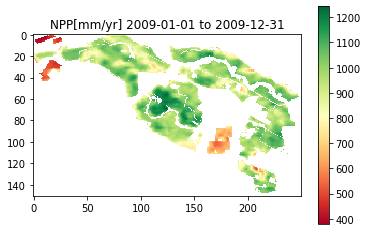

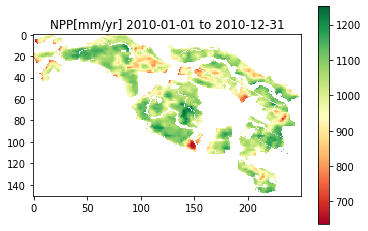

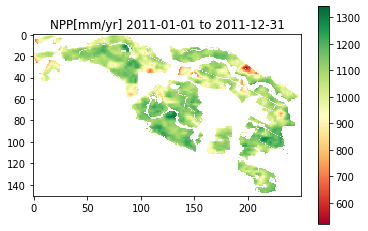

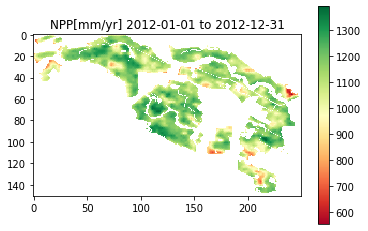

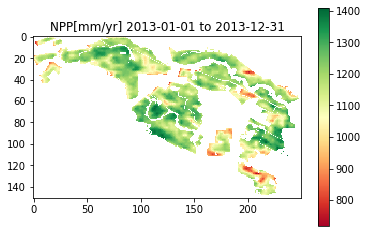

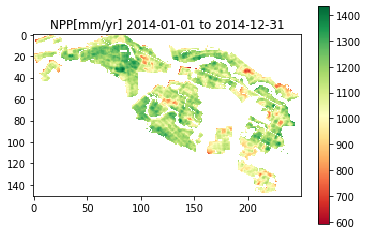

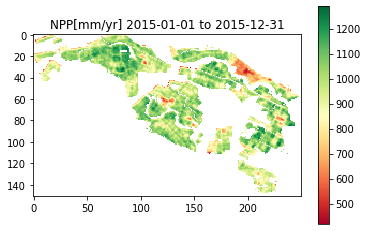

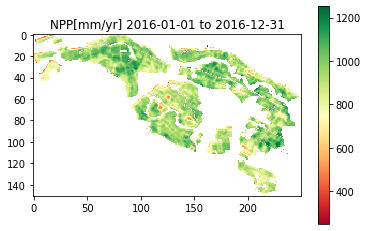

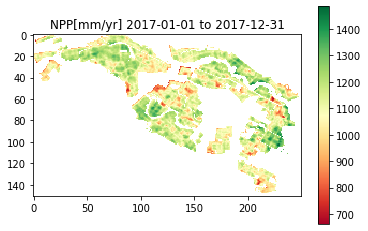

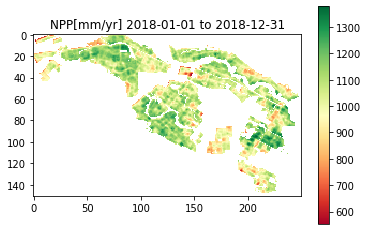

In [30]:
# collecting Geoinfo such as projection, the x and y axis
in_fh=input_fhs[0]
driver,NDV,xsize,ysize,GeoT,Projection=gis.GetGeoInfo(in_fh)

# # function to aggregate the NPP data per crop season
def SumSeason(in_fh, sowing_date, harvesting_date, LCC, a=ProArea[0], saveSum = output_folder):
    period_dates=pd.date_range(sowing_date,harvesting_date,freq='D')
    period_fhs=[]
    for in_fh in input_fhs:
        #get raster id from file name
        raster_id=os.path.split(in_fh)[-1].split('.')[0]
        #get raster info using raster id
        raster_info=df_avail.loc[df_avail['raster_id']==raster_id]
        #get start and end date of raster
        raster_startdate=raster_info['time_code'].iloc[0].split(',')[0] 
        raster_startdate=re.sub(r"[[)]","", raster_startdate)
        raster_enddate=raster_info['time_code'].iloc[0].split(',')[-1]
        raster_enddate=re.sub(r"[[)]","", raster_enddate)
        #check if raster belong to period
        if ((raster_startdate in period_dates) or (raster_enddate in period_dates)):
            period_fhs.append(in_fh)
    
    # add the layers between the sowing and harvesting dates
    period_fhs
    period_fh=period_fhs[0]
    Sums=0
    for period_fh in period_fhs:
        Sum=gis.OpenAsArray(period_fh ,nan_values=True)
        Sum=np.where(Sum<0,0,Sum) #mask out flagged value -9998
        Sums+=Sum
 
    # maskout non crop here
    Lcc=gis.OpenAsArray(LCC)  
    ProAreaA=gis.OpenAsArray(a, nan_values=True)
    Sums=np.where((Lcc==42) & (ProAreaA==1),Sums,np.nan)
    
    # save the array in raster format, name it with the raster_id and sowing and harvesting date
    out_fh=os.path.join(output_folder,raster_id.split('_')[1]+'_'+sowing_date+'_to_'+harvesting_date+'.tif')        
    gis.CreateGeoTiff(out_fh,Sums,driver,NDV,xsize,ysize,GeoT,Projection) ### Save the array 'Sums' as raster

    # Plot the raster map
    plt.imshow(Sums, cmap='RdYlGn')
    plt.colorbar()
    plt.title(raster_id.split('_')[1]+'[mm/yr] {}'.format(sowing_date)+' to {}'.format(harvesting_date))
    plt.show()  
    
    return Sums

## Specify the planting and harvesting date

NPPseason1 = SumSeason(input_fhs, '2009-01-01','2009-12-31', LCC=LCC_tifs[0])
NPPseason2 = SumSeason(input_fhs, '2010-01-01','2010-12-31', LCC=LCC_tifs[1])
NPPseason3 = SumSeason(input_fhs, '2011-01-01','2011-12-31', LCC=LCC_tifs[2])
NPPseason4 = SumSeason(input_fhs, '2012-01-01','2012-12-31', LCC=LCC_tifs[3])
NPPseason5 = SumSeason(input_fhs, '2013-01-01','2013-12-31', LCC=LCC_tifs[4])
NPPseason6 = SumSeason(input_fhs, '2014-01-01','2014-12-31', LCC=LCC_tifs[5])
NPPseason7 = SumSeason(input_fhs, '2015-01-01','2015-12-31', LCC=LCC_tifs[6])
NPPseason8 = SumSeason(input_fhs, '2016-01-01','2016-12-31', LCC=LCC_tifs[7])
NPPseason9 = SumSeason(input_fhs, '2017-01-01','2017-12-31', LCC=LCC_tifs[8])
NPPseason10 = SumSeason(input_fhs, '2018-01-01','2018-12-31', LCC=LCC_tifs[9])


In [26]:
NPPseason2.shape

(151, 250)


## Exercise (4b)
Calculate the NPP per crop season for your project area
